In [9]:
from __future__ import division
import time
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
import pickle
import os.path
from zipfile import ZipFile
import sys, os
from os.path import join, dirname, abspath
from pathlib import Path
import classification as cl
import feature_selection as fs
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pickle
import os.path
from zipfile import ZipFile
import sys, os


In [2]:
def load_data():
    beta_file = os.path.realpath('../GSE59685_betas2.csv.zip')
    zipfile = ZipFile(beta_file)
    zipfile.getinfo('GSE59685_betas2.csv').file_size += (2 ** 64) - 1
    betaqn = pd.read_csv(zipfile.open('GSE59685_betas2.csv'),skiprows=(1,2), index_col=0,sep=',')
    betaqn = betaqn.T

    info = pd.read_csv('info.csv.zip',index_col=1, compression='zip',sep=',')
    info = info.drop('Unnamed: 0', 1)

    info.loc[(info.braak_stage=='5') | (info.braak_stage=='6'),'braak_bin'] = 1
    cond = ((info.braak_stage=='0') | (info.braak_stage=='1') | (info.braak_stage=='2') |
            (info.braak_stage=='3') | (info.braak_stage=='4'))
    info.loc[cond ,'braak_bin'] = 0
    info.loc[info.source_tissue == 'entorhinal cortex', 'tissue'] = 'EC'
    info.loc[info.source_tissue == 'whole blood', 'tissue'] = 'WB'
    info.loc[info.source_tissue == 'frontal cortex', 'tissue'] = 'FC'
    info.loc[info.source_tissue == 'superior temporal gyrus', 'tissue'] = 'STG'
    info.loc[info.source_tissue == 'cerebellum', 'tissue'] = 'CER'
    return (betaqn, info)

In [3]:
betaqn, info = load_data()

In [361]:
tissue = 'EC'
feat_sel = 't_test'

In [362]:
save_file = os.path.realpath('../DATA/train_on_blood')
features_file = save_file + "/features_train_blood_%s_%s.p" % (tissue, feat_sel)
my_file = Path(features_file)
if feat_sel == 't_test' or feat_sel == 'fisher' :
    if my_file.is_file():
        features_all = pickle.load( open( features_file, "rb" ) )
    else:
        print('NO FILE')

In [374]:
ec = betaqn.loc[info[(info.tissue == tissue) & (info.braak_stage != 'Exclude')].index]
blood = betaqn.loc[info[(info.tissue == 'WB') & (info.braak_stage != 'Exclude')].index]

In [375]:
num

50

In [376]:
num = 50
train_full = blood
train = train_full[features_all]
train_red = train_full[features_all[0:num]]
test = ec
test = test[features_all]
test_red = test[features_all[0:num]]
y_train = info['braak_bin'].loc[train.index]
y_true = info['braak_bin'].loc[test.index]

In [377]:
together = pd.concat([train,test])
together_red = pd.concat([train_red,test_red])

In [378]:
together_red.shape

(176, 50)

In [379]:
test.shape

(104, 485577)

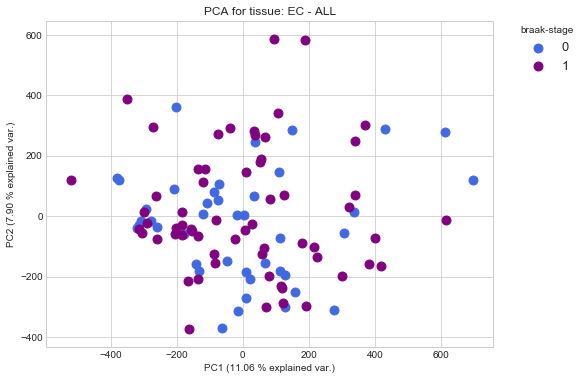

In [387]:
ec = test
labels = info['braak_bin'].loc[test.index]
labels = np.array(labels)
ec1 = StandardScaler().fit_transform(ec)
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(ec1)
target_names = ['0','1']
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for c, i, target_name in zip(['royalblue','purple'],[0,1], target_names, ):
        plt.scatter(x=plot_columns[labels==i,0],
                    y=plot_columns[labels==i,1],
                    c=c, label=target_name, s=80)
    plt.xlabel('PC1 (%.2f %% explained var.)' % (pca_2.explained_variance_ratio_[0] * 100))
    plt.ylabel('PC2 (%.2f %% explained var.)' % (pca_2.explained_variance_ratio_[1] * 100))
    plt.legend(title='braak-stage', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=13)
    plt.title('PCA for tissue: %s - ALL' %tissue)
    plt.show()

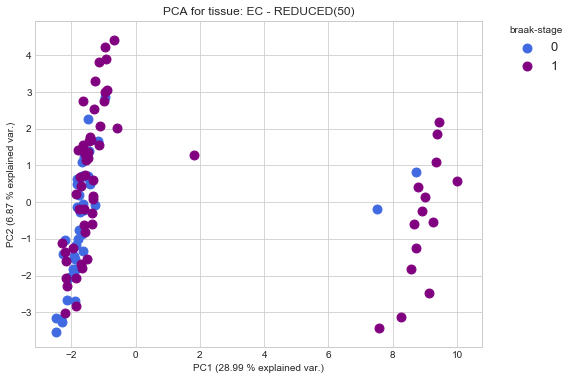

In [389]:
ec = test_red
labels = info['braak_bin'].loc[test_red.index]
labels = np.array(labels)
ec1 = StandardScaler().fit_transform(ec)
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(ec1)
target_names = ['0','1']
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for c, i, target_name in zip(['royalblue','purple'],[0,1], target_names, ):
        plt.scatter(x=plot_columns[labels==i,0],
                    y=plot_columns[labels==i,1],
                    c=c, label=target_name, s=80)
    plt.xlabel('PC1 (%.2f %% explained var.)' % (pca_2.explained_variance_ratio_[0] * 100))
    plt.ylabel('PC2 (%.2f %% explained var.)' % (pca_2.explained_variance_ratio_[1] * 100))
    plt.legend(title='braak-stage', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=13)
    plt.title('PCA for tissue: %s - REDUCED(%d)' %(tissue,num))
    plt.show()

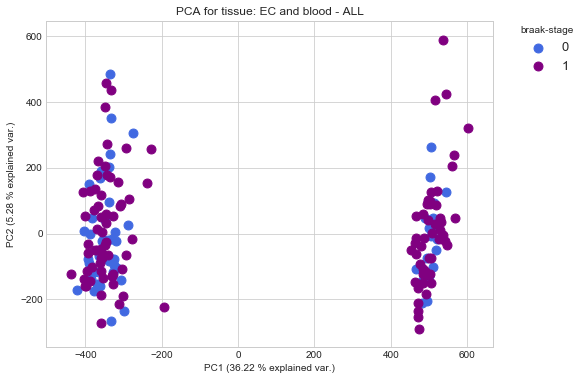

In [380]:
ec = together
labels = info['braak_bin'].loc[together.index]
labels = np.array(labels)
ec1 = StandardScaler().fit_transform(ec)
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(ec1)
target_names = ['0','1']
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for c, i, target_name in zip(['royalblue','purple'],[0,1], target_names, ):
        plt.scatter(x=plot_columns[labels==i,0],
                    y=plot_columns[labels==i,1],
                    c=c, label=target_name, s=80)
    plt.xlabel('PC1 (%.2f %% explained var.)' % (pca_2.explained_variance_ratio_[0] * 100))
    plt.ylabel('PC2 (%.2f %% explained var.)' % (pca_2.explained_variance_ratio_[1] * 100))
    plt.legend(title='braak-stage', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=13)
    plt.title('PCA for tissue: %s and blood - ALL' %tissue)
    plt.show()

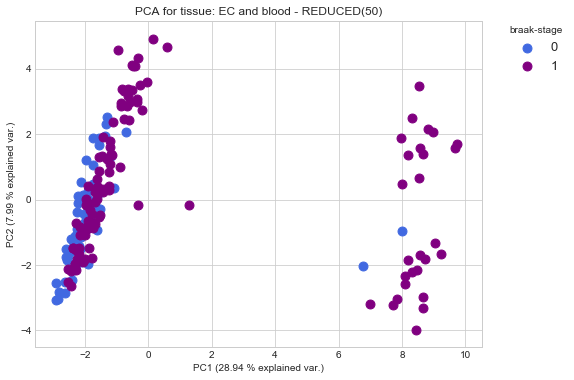

In [381]:
ec = together_red
labels = info['braak_bin'].loc[together.index]
labels = np.array(labels)
ec1 = StandardScaler().fit_transform(ec)
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(ec1)
target_names = ['0','1']
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for c, i, target_name in zip(['royalblue','purple'],[0,1], target_names, ):
        plt.scatter(x=plot_columns[labels==i,0],
                    y=plot_columns[labels==i,1],
                    c=c, label=target_name, s=80)
    plt.xlabel('PC1 (%.2f %% explained var.)' % (pca_2.explained_variance_ratio_[0] * 100))
    plt.ylabel('PC2 (%.2f %% explained var.)' % (pca_2.explained_variance_ratio_[1] * 100))
    plt.legend(title='braak-stage', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=13)
    plt.title('PCA for tissue: %s and blood - REDUCED(%d)' %(tissue,num))
    plt.show()

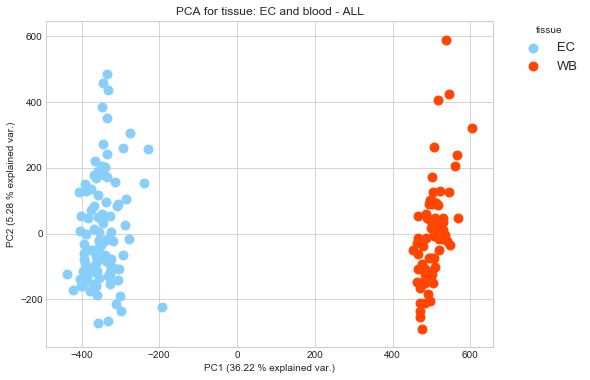

In [382]:
ec = together
labels = info['tissue'].loc[together.index]
labels = np.array(labels)
ec1 = StandardScaler().fit_transform(ec)
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(ec1)
target_names = ['EC','WB']
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for c, i, target_name in zip(['lightskyblue','orangered'],target_names, target_names, ):
        plt.scatter(x=plot_columns[labels==i,0],
                    y=plot_columns[labels==i,1],
                    c=c, label=target_name, s=80)
    plt.xlabel('PC1 (%.2f %% explained var.)' % (pca_2.explained_variance_ratio_[0] * 100))
    plt.ylabel('PC2 (%.2f %% explained var.)' % (pca_2.explained_variance_ratio_[1] * 100))
    plt.legend(title='tissue',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=13)
    plt.title('PCA for tissue: %s and blood - ALL' %tissue)
    plt.show()

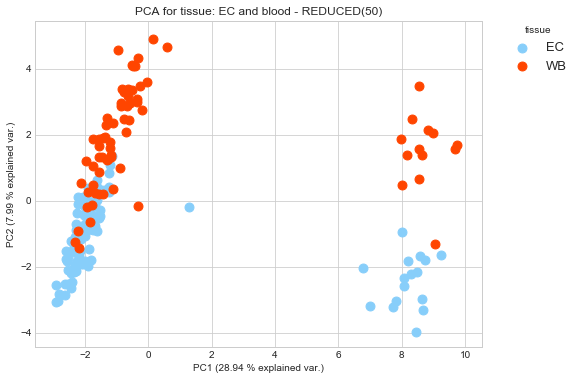

In [383]:
ec = together_red
labels = info['tissue'].loc[together.index]
labels = np.array(labels)
ec1 = StandardScaler().fit_transform(ec)
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(ec1)
target_names = ['EC','WB']
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for c, i, target_name in zip(['lightskyblue','orangered'],target_names, target_names, ):
        plt.scatter(x=plot_columns[labels==i,0],
                    y=plot_columns[labels==i,1],
                    c=c, label=target_name, s=80)
    plt.xlabel('PC1 (%.2f %% explained var.)' % (pca_2.explained_variance_ratio_[0] * 100))
    plt.ylabel('PC2 (%.2f %% explained var.)' % (pca_2.explained_variance_ratio_[1] * 100))
    plt.legend(title='tissue', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=13)
    plt.title('PCA for tissue: %s and blood - REDUCED(%d)' %(tissue,num))
    plt.show()

In [384]:
labels

array(['WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB',
       'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB',
       'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB',
       'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB',
       'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB',
       'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'WB',
       'WB', 'WB', 'WB', 'WB', 'WB', 'WB', 'EC', 'EC', 'EC', 'EC', 'EC',
       'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC',
       'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC',
       'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC',
       'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC',
       'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC',
       'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC',
       'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'EC', 'E

In [ ]:
#RANDOM
from random import randint
x=[features_all[randint(0,485577)] for p in range(20)]


In [189]:
train_full = blood
start_time = time.time()
train = train_full[x]
test = ec
test = test[x]
y_train = info['braak_bin'].loc[train.index]
y_true = info['braak_bin'].loc[test.index]

In [190]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
print('SVM-rbf')
param_grid = [{'C': C_range, 'gamma': gamma_range, 'kernel': ['rbf']}]

svr = svm.SVC(random_state=1234)
clf = GridSearchCV(svr, param_grid, cv=5, verbose=1, n_jobs = -1)
clf.fit(train, y_train)
y_rbf = clf.predict(test)
c_rbf = clf.best_params_['C']
gamma_rbf = clf.best_params_['gamma']

SVM-rbf
Fitting 5 folds for each of 169 candidates, totalling 845 fits


[Parallel(n_jobs=-1)]: Done 845 out of 845 | elapsed:   10.8s finished


In [191]:
np.vstack((y_true,y_rbf)).T

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 0.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 0.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 0.,  1.],
       [ 1.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 0.,  1.],
       [ 1.,  1.],
       [ 0.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 0.,  1.],
       [ 0.,

In [276]:
save_file = os.path.realpath('../DATA/predict_on_blood')
tissue = 'EC'
feat_sel = 't_test'
featuresEC = pickle.load( open( save_file +  "/features_blood_%s_%s.p" % (tissue, feat_sel), "rb" )  )

In [277]:
save_file = os.path.realpath('../DATA/train_on_blood')
tissue = 'FC'
feat_sel = 't_test'
featuresWB = pickle.load( open( save_file +  "/features_train_blood_%s_%s.p" % (tissue, feat_sel), "rb" )  )

In [290]:
len(set(featuresEC[0:20]).intersection(set(featuresWB[0:20])))

6

In [390]:
ec = betaqn.loc[info[(info.tissue == tissue) & (info.braak_stage != 'Exclude')].index]

In [391]:
cat = info['braak_bin'].loc[ec.index]

In [392]:
from sklearn.model_selection import StratifiedKFold

In [393]:
skf = StratifiedKFold(n_splits=5, random_state=11)
for train_index, test_index in skf.split(ec, cat):
    cur_ec = ec.iloc[train_index]
    cur_cat = cat[test_index]
    print(cur_ec)
    break

                   cg00000029  cg00000108  cg00000109  cg00000165  cg00000236  \
barcode                                                                         
6929718138_R02C02    0.633617    0.885219    0.713551    0.245681    0.794920   
6929718138_R05C02    0.649922    0.890048    0.702154    0.235552    0.812281   
6929726046_R02C01    0.573018    0.893303    0.768011    0.240620    0.796908   
6969568087_R06C01    0.582860    0.913062    0.681566    0.243094    0.847535   
7796806002_R06C02    0.605664    0.906185    0.768997    0.258519    0.808969   
6929718123_R06C01    0.625702    0.876142    0.739299    0.257345    0.811849   
6929726046_R06C01    0.593376    0.890306    0.733221    0.265994    0.832997   
6969568082_R05C01    0.593975    0.881576    0.732012    0.236195    0.810666   
6969568087_R04C01    0.506584    0.881218    0.719511    0.223384    0.827833   
6969568084_R05C01    0.562820    0.857321    0.721254    0.219814    0.797659   
6969568082_R06C02    0.61527

In [397]:
cur_ec.shape

(82, 485577)